<a href="https://colab.research.google.com/github/suryanshujain/MainTask/blob/main/NLPonAviraPasswordManager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google_play_scraper

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.4 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app
from google_play_scraper import Sort, reviews_all
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline

In [ ]:
reviews = reviews_all('com.avira.passwordmanager',sleep_milliseconds=0,lang='en', country='in',sort=Sort.NEWEST)

In [ ]:
reviews_df= pd.DataFrame(np.array(reviews),columns=['review'])
reviews_df = reviews_df.join(pd.DataFrame(reviews_df.pop('review').tolist()))

In [ ]:
sentiment_analysis=pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
reviews_df['result']=reviews_df['content'].apply(lambda x: sentiment_analysis(x))

In [ ]:
reviews_df['sentiment']=reviews_df['result'].apply(lambda x:x[0]['label'])
reviews_df['score']=reviews_df['result'].apply(lambda x:x[0]['score'])

In [ ]:
reviews_df['sentiment'].value_counts(normalize=True)

POSITIVE    0.675
NEGATIVE    0.325
Name: sentiment, dtype: float64

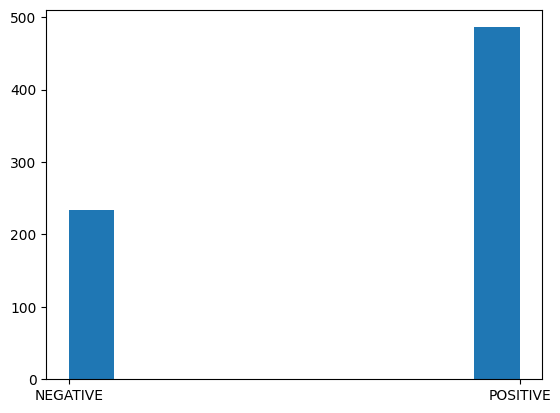

In [ ]:
plt.hist(reviews_df['sentiment'])
plt.show()